In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Auto Insurance Claim.csv')
data

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [3]:
data.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
data.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [5]:
# Columns such as customer, state code, effective to date, and country dont have any influence on the insurance claim
data.drop(columns=['Customer', 'State Code', 'Effective To Date', 'Country'], inplace=True)

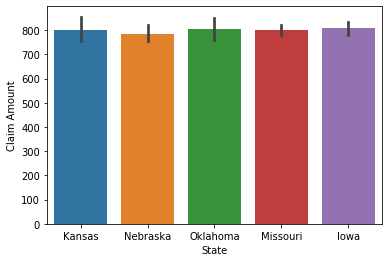

In [6]:
# Analyzing claim amount based on the state
sns.barplot(x="State",y="Claim Amount",data=data)
plt.show()

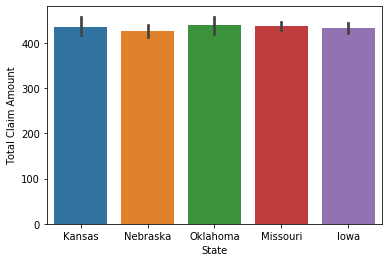

In [7]:
# Analyzing total claim amount based on the state
sns.barplot(x="State",y="Total Claim Amount",data=data)
plt.show()

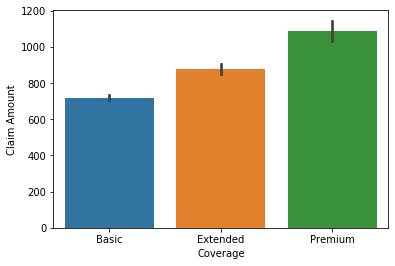

In [8]:
# Analyzing the claim amount based on the type of coverage
sns.barplot(x="Coverage", y="Claim Amount", data=data)
plt.show()

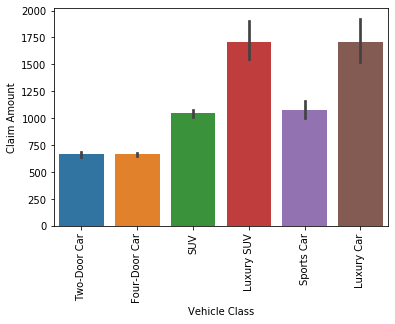

In [10]:
# Analyzing the number of open compliants by type of vehicle
# Highest claim amount is for Luxury SUV and Luxury cars
plt.xticks(rotation=90)
sns.barplot(x="Vehicle Class", y="Claim Amount", data=data)
plt.show()

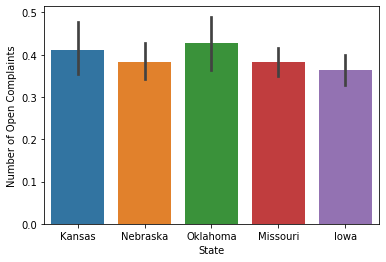

In [11]:
# Analyzing the number of open compliants by state
sns.barplot(x="State", y="Number of Open Complaints", data=data)
plt.show()

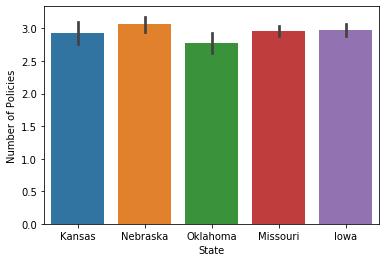

In [12]:
# Analyzing the number of open compliants by state
sns.barplot(x="State", y="Number of Policies", data=data)
plt.show()

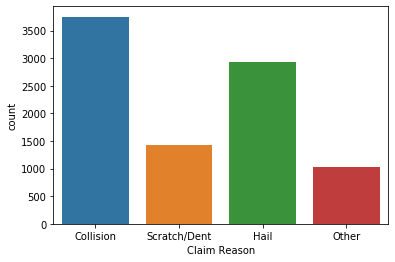

In [13]:
# Analyzing the most prominent claim reasons
sns.countplot(x="Claim Reason",data=data)
plt.show()

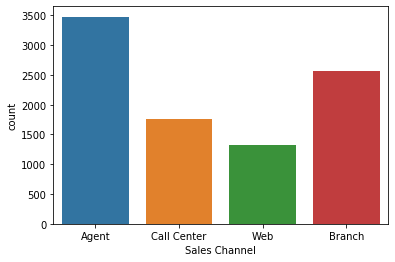

In [14]:
# Analyzing the number of open compliants by sales channel
# The most preferred channel for buying policies is agency channel
sns.countplot(x="Sales Channel", data=data)
plt.show()

In [20]:
data.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [15]:
data.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [17]:
x=data.drop(columns=['Claim Amount'])
y=data['Claim Amount']

In [22]:
x=pd.get_dummies(x, drop_first=True)
x

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Kansas,State_Missouri,State_Nebraska,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,56274,69,32,5,0,1,384.811147,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,94,13,42,0,8,1131.464935,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,48767,108,18,38,0,2,566.472247,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,106,18,65,0,7,529.881344,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,43836,73,12,44,0,1,138.130879,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,71941,73,18,89,0,2,198.234764,0,1,0,...,0,0,1,0,0,0,0,0,1,0
9130,21604,79,14,28,0,1,379.200000,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9131,0,85,9,37,3,2,790.784983,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9132,21941,96,34,3,0,3,691.200000,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
a=sc.transform(x)
x=pd.DataFrame(a,columns=x.columns)
x

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Kansas,State_Missouri,State_Nebraska,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640,3.232045,-0.725537,-0.478722,...,-0.625215,-0.489405,-0.411917,-0.134795,-0.143383,-0.494726,-0.236545,1.960371,0.649504,-0.489233
1,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737,-0.309402,-0.725537,2.088894,...,-0.625215,-0.489405,-0.411917,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,0.649504,-0.489233
2,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734,-0.309402,-0.725537,-0.478722,...,-0.625215,-0.489405,-0.411917,-0.134795,-0.143383,-0.494726,-0.236545,1.960371,0.649504,-0.489233
3,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769,-0.309402,1.378290,-0.478722,...,-0.625215,2.043299,-0.411917,-0.134795,-0.143383,2.021323,-0.236545,-0.510108,0.649504,-0.489233
4,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843,3.232045,-0.725537,-0.478722,...,-0.625215,-0.489405,-0.411917,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,0.649504,-0.489233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934,-0.309402,1.378290,-0.478722,...,-0.625215,-0.489405,2.427671,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,0.649504,-0.489233
9130,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956,-0.309402,1.378290,-0.478722,...,1.599450,-0.489405,-0.411917,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,0.649504,-0.489233
9131,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937,-0.309402,1.378290,-0.478722,...,1.599450,-0.489405,-0.411917,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,0.649504,-0.489233
9132,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113,-0.309402,1.378290,-0.478722,...,1.599450,-0.489405,-0.411917,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,-1.539636,-0.489233


In [35]:
y=np.array(y)
y.reshape(-1,1)
y=pd.DataFrame(y)

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(y)
y=sc.transform(y)
y=pd.DataFrame(y)
y

,0
0,-0.762878
1,-0.149245
2,0.710636
3,-0.052263
4,-0.755575
...,...
9129,2.241590
9130,-0.714411
9131,0.023135
9132,-0.069935


In [37]:
from sklearn.metrics import r2_score
def maxr2score(cm,x,y):
    maxr2=0
    rs=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.2)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        rsc=r2_score(y_test,y_pred)
        if rsc>maxr2:
            maxr2=rsc
            rs=r_state
    print("Maximum r2_score is at random state :",rs," and it is :",maxr2)

In [38]:
# Using Linear regression model
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=.20)
lr=LinearRegression()
lr.fit(x_train,y_train)
predicty=lr.predict(x_test)
print('The mean absolute error for linear regression model is :', mean_absolute_error(y_test, predicty))
print('The mean square error for linear regression model is :', mean_squared_error(y_test, predicty))
print('The root mean square error for linear regression model is :', np.sqrt(mean_squared_error(y_test, predicty)))

The mean absolute error for linear regression model is : 0.5813003202041154
The mean square error for linear regression model is : 0.9223745818858018
The root mean square error for linear regression model is : 0.9604033433333111


In [43]:
# Using Ridge regression
from sklearn.linear_model import Ridge
rr=Ridge()
hyperparametersrr={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridrr = GridSearchCV(rr, hyperparametersrr, cv=10)
gridrr.fit(x,y)
gridrr.best_params_

{'alpha': 100}

In [47]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=100)
maxr2score(rr,x,y)

Maximum r2_score is at random state : 37  and it is : 0.19604821162524488


In [48]:
print("Mean r2 score for Ridge regression after cross validation: ", cross_val_score(rr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Ridge regression from mean r2 score is : ", cross_val_score(rr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Ridge regression after cross validation:  0.15318441510687042
Standard deviation for Ridge regression from mean r2 score is :  0.0183134490949503


In [46]:
# Using Lasso regression
from sklearn.linear_model import Lasso
lar=Lasso()
hyperparameterlar={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridlar = GridSearchCV(lar, hyperparameterlar, cv=5)
gridlar.fit(x,y)
gridlar.best_params_

{'alpha': 0.01}

In [49]:
from sklearn.linear_model import Lasso
lar=Lasso(alpha=0.01)
maxr2score(lar,x,y)

Maximum r2_score is at random state : 37  and it is : 0.1977363696309612


In [50]:
print("Mean r2 score for Lasso regression after cross validation: ", cross_val_score(lar,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Lasso regression from mean r2 score is : ", cross_val_score(lar,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso regression after cross validation:  0.15754483770084293
Standard deviation for Lasso regression from mean r2 score is :  0.019236731904115092


In [51]:
# Using KNN regressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
hyperparameter={"n_neighbors":range(1,12)}
gridknr = GridSearchCV(knr, hyperparameter, cv=5, n_jobs=-1)
gridknr.fit(x,y)
gridknr.best_params_

{'n_neighbors': 11}

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=4)
maxr2score(knr,x,y)

Maximum r2_score is at random state : 36  and it is : 0.9235005028289005


In [52]:
print("Mean r2 score for KNeighborsRegressor after cross validation: ", cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for KNeighborsRegressor from mean r2 score is : ", cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for KNeighborsRegressor after cross validation:  0.06601419636939423
Standard deviation for KNeighborsRegressor from mean r2 score is :  0.030394031884099372


In [53]:
# Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
hyperparametersdtr={'criterion':['mse','mae'],'max_depth':range(1,2)}
griddtr=GridSearchCV(dtr, hyperparametersdtr, cv=5, scoring='r2')
griddtr.fit(x,y)
print(griddtr.best_params_)

{'criterion': 'mse', 'max_depth': 1}


In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mse', max_depth=1)
maxr2score(dtr,x,y)

Maximum r2_score is at random state : 32  and it is : 0.2614678625546255


In [55]:
print("Mean r2 score for Decision Tree Regressor after cross validation: ", cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Decision Tree Regressor from mean r2 score is : ", cross_val_score(dtr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Decision Tree Regressor after cross validation:  0.2270201173021082
Standard deviation for Decision Tree Regressor from mean r2 score is :  0.012517365884957825


In [56]:
# Among all the models, KNN Regressor is the best performing model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 36,test_size=0.20)
knr=KNeighborsRegressor(n_neighbors=4)
knr.fit(x_train,y_train)
predictknry=knr.predict(x_test)
print('The mean absolute error for linear regression model is :', mean_absolute_error(y_test, predictknry))
print('The mean square error for linear regression model is :', mean_squared_error(y_test, predictknry))
print('The root mean square error for linear regression model is :', np.sqrt(mean_squared_error(y_test, predictknry)))

The mean absolute error for linear regression model is : 0.5818322525282912
The mean square error for linear regression model is : 0.8426422056541958
The root mean square error for linear regression model is : 0.9179554486216615


In [57]:
# Saving the decision tree model
from sklearn.externals import joblib 
joblib.dump(knr, 'AutoInsuranceClaim.pkl')

['AutoInsuranceClaim.pkl']